### Import Library 📚


In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650
GPU: NVIDIA GeForce GTX 1650 is available.


In [3]:
#Configure device: Set the device configuration to GPU using the torch.device class in PyTorch:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


#### Load Data

In [4]:
df = pd.read_csv('bca.csv', delimiter=',')
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d46e2914-795d-479c-a59f-a91cf3c2c475,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon donk kembalikan tanda biru hitam saat li...,1,0,4.5.7,2025-01-25 10:22:40,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, moh...",2025-01-25 10:33:13,4.5.7
1,2e383ccf-8c54-4f0f-a335-378060c6037b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa sekarang untuk transfer ke blu bca ada ...,2,0,4.5.7,2025-01-25 09:42:28,"Mhn maaf ats ketidaknyamanannya Bapak/Ibu, efe...",2025-01-25 10:22:09,4.5.7
2,6c5f1e51-4a74-4277-8e95-54dad6892f80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Oke Terimakasih,5,0,4.5.7,2025-01-25 08:57:48,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-01-25 10:33:46,4.5.7
3,2e6d1b59-a8ac-4d14-bd4b-8ea099def924,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolong pihak developer untuk update hp saya ga...,5,0,NaN,2025-01-25 08:36:34,Mohon maaf atas kendala yang Bapak/Ibu alami. ...,2025-01-25 10:25:15,NaN
4,f8c117fe-4195-4c1f-bd76-2e9b79f905ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,4.5.7,2025-01-25 08:35:24,Thank you for the review. Hopefully the BCA mo...,2025-01-25 10:22:05,4.5.7
5,f6526b0c-9908-49a6-8897-9fda74c79321,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bintang yg berkata,5,0,4.5.5,2025-01-25 08:22:11,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-01-25 10:22:03,4.5.5
6,4d352a1e-8b13-4e4c-9142-f517eedd3b1d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,NaN,2025-01-25 08:20:53,Thank you for the review. Hopefully the BCA mo...,2025-01-25 10:22:02,NaN
7,7be00b87-6199-4967-886b-8ee7c87d3545,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,memper mudah,5,0,4.5.7,2025-01-25 06:16:22,Terima kasih atas ulasannya. Semoga aplikasi m...,2025-01-25 10:21:59,4.5.7
8,88b307db-d6b2-474a-a6a0-c6758f61ae11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"min, cara liat bukti tranfer gmna sih. kmren s...",1,0,4.5.7,2025-01-25 06:03:25,Mhn maaf ats kendalanya Bapak/Ibu. Cek bukti t...,2025-01-25 10:21:58,4.5.7
9,f04801c8-dda8-437c-8d83-390e1ebfbfd8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Baik,5,0,4.5.7,2025-01-25 04:35:47,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-01-25 10:21:58,4.5.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              14000 non-null  object
 1   userName              14000 non-null  object
 2   userImage             14000 non-null  object
 3   content               14000 non-null  object
 4   score                 14000 non-null  int64 
 5   thumbsUpCount         14000 non-null  int64 
 6   reviewCreatedVersion  11579 non-null  object
 7   at                    14000 non-null  object
 8   replyContent          14000 non-null  object
 9   repliedAt             14000 non-null  object
 10  appVersion            11579 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


In [6]:
df.shape

(14000, 11)

In [7]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2421
at                         0
replyContent               0
repliedAt                  0
appVersion              2421
dtype: int64

In [8]:
df2 = df.dropna()

In [9]:
df2.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

In [10]:
df2.shape

(11579, 11)

#### Selecting column for Sentiment [Content]

In [11]:
# Selecting specific column
pd.set_option('display.max_colwidth', None)
df2 = df[['content','score','at']]
df2.head(10)

,content,score,at
0,Mohon donk kembalikan tanda biru hitam saat lihat transaksi . Biru masuk hitam keluar.,1,2025-01-25 10:22:40
1,Kenapa sekarang untuk transfer ke blu bca ada biaya admin nya? Dulu ga ada..,2,2025-01-25 09:42:28
2,Oke Terimakasih,5,2025-01-25 08:57:48
3,tolong pihak developer untuk update hp saya ga bisa login,5,2025-01-25 08:36:34
4,ok,5,2025-01-25 08:35:24
5,Bintang yg berkata,5,2025-01-25 08:22:11
6,Good,5,2025-01-25 08:20:53
7,memper mudah,5,2025-01-25 06:16:22
8,"min, cara liat bukti tranfer gmna sih. kmren sya tf tapi pnding. bsok ny liat udah gak ad pending nya, tapi liat buktinya gak ada di notif. gimna min?",1,2025-01-25 06:03:25
9,Baik,5,2025-01-25 04:35:47


### Quick EDA🌎

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

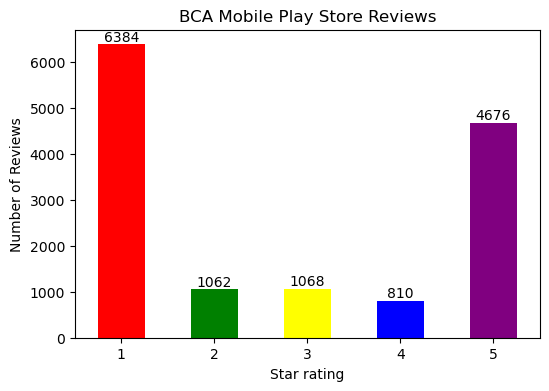

In [13]:
score = df2['score'].value_counts().sort_index()
plt.figure(figsize=(6,4))
colors = ['red','green','yellow','blue','purple']
ax = score.plot(kind='bar', color=colors)
plt.xlabel("Star rating")
plt.ylabel("Number of Reviews")
plt.title("BCA Mobile Play Store Reviews")
plt.xticks(rotation=0)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

C:\Users\Darren\AppData\Local\Temp\ipykernel_12332\4013758540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['score'].apply(quick_sentiment)


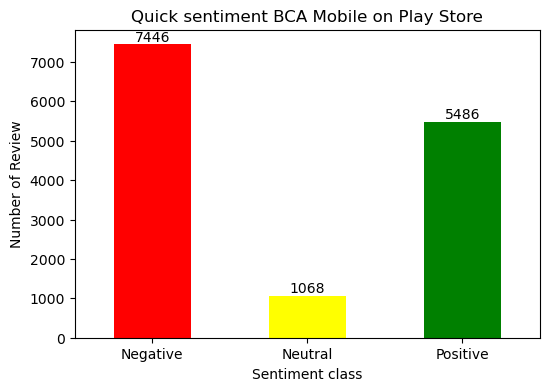

In [16]:
def quick_sentiment(rating):
    rating = int(rating)

    #convert to class
    if rating<= 2:
        return 0 #negative
    elif rating==3:
        return 1 #neutral
    else:
        return 2 #positive
    
df2['sentiment'] = df2['score'].apply(quick_sentiment)
sentimentcounts =df2['sentiment'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sentimentcolors = ['red','yellow','green']
ax = sentimentcounts.plot(kind='bar',color=sentimentcolors)

plt.xlabel("Sentiment class")
plt.ylabel("Number of Review")
plt.title("Quick sentiment BCA Mobile on Play Store")
plt.xticks([0,1,2],['Negative','Neutral','Positive'], rotation=0)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

### Pre-processing Data (Text Cleaning)

In [17]:
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'(.)\1+', r'\1\1', text) # Remove repeated words
    text = text.lower()                  # Convert to lowercase
    return text

In [18]:
import nltk
nltk.download('punkt_tab')

df2.loc[:,'content'] = df2['content'].astype(str).apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
# preprocessed data

pd.set_option('display.max_colwidth', None)  # Display full content of columns
df2.head(10)

,content,score,at,sentiment
0,mohon donk kembalikan tanda biru hitam saat lihat transaksi biru masuk hitam keluar,1,2025-01-25 10:22:40,0
1,kenapa sekarang untuk transfer ke blu bca ada biaya admin nya dulu ga ada,2,2025-01-25 09:42:28,0
2,oke terimakasih,5,2025-01-25 08:57:48,2
3,tolong pihak developer untuk update hp saya ga bisa login,5,2025-01-25 08:36:34,2
4,ok,5,2025-01-25 08:35:24,2
5,bintang yg berkata,5,2025-01-25 08:22:11,2
6,good,5,2025-01-25 08:20:53,2
7,memper mudah,5,2025-01-25 06:16:22,2
8,min cara liat bukti tranfer gmna sih kmren sya tf tapi pnding bsok ny liat udah gak ad pending nya tapi liat buktinya gak ada di notif gimna min,1,2025-01-25 06:03:25,0
9,baik,5,2025-01-25 04:35:47,2


In [20]:
df2.isnull().sum()

content      0
score        0
at           0
sentiment    0
dtype: int64

In [19]:
df2.to_csv('bca_preprocessed_data_stlit.csv', index=False)